# 📈 **Polynomial Regression: A Comprehensive Guide**

---

## 📖 **Table of Contents**

1. [Introduction & Motivation](#introduction--motivation)
2. [Mathematical Foundation](#mathematical-foundation)
3. [Polynomial Features & Transformation](#polynomial-features--transformation)
4. [Model Fitting & Parameter Estimation](#model-fitting--parameter-estimation)
5. [Degrees of Polynomials](#degrees-of-polynomials)
6. [Overfitting & Underfitting](#overfitting--underfitting)
7. [Regularization Techniques](#regularization-techniques)
8. [Model Selection & Validation](#model-selection--validation)
9. [Multivariate Polynomial Regression](#multivariate-polynomial-regression)
10. [Implementation & Examples](#implementation--examples)
11. [Advantages & Limitations](#advantages--limitations)
12. [Best Practices](#best-practices)

---

## 🚀 **Introduction & Motivation**

### **What is Polynomial Regression?**

Polynomial regression is an extension of **linear regression** that models the relationship between a dependent variable and independent variables using **polynomial functions**. While still linear in parameters, it can capture **non-linear relationships** in the data.

### **Why Polynomial Regression?**

Real-world relationships are often **non-linear**:
- 📊 Economic growth curves
- 🌡️ Temperature variations
- 📈 Population dynamics
- ⚡ Physical phenomena
- 🧬 Biological processes

### **Key Insight**

Although the relationship between variables is **non-linear**, polynomial regression remains **linear in parameters**, making it solvable using linear algebra techniques.

### **Visual Intuition**

Linear regression fits a straight line:
$$y = \beta_0 + \beta_1 x$$

Polynomial regression fits curves:
$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n$$

---

## 🧮 **Mathematical Foundation**

### **General Form**

For a polynomial of degree $n$:

$$\boxed{y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n + \epsilon}$$

Where:
- $y$ is the **dependent variable**
- $x$ is the **independent variable**
- $\beta_0, \beta_1, \ldots, \beta_n$ are **coefficients/parameters**
- $\epsilon$ is the **error term**
- $n$ is the **degree** of the polynomial

### **Matrix Representation**

For $m$ observations, the polynomial regression can be written as:

$$\boxed{\mathbf{y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\epsilon}}$$

Where:

$$\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{bmatrix}, \quad 
\mathbf{X} = \begin{bmatrix} 
1 & x_1 & x_1^2 & \cdots & x_1^n \\
1 & x_2 & x_2^2 & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & \cdots & x_m^n 
\end{bmatrix}$$

$$\boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n \end{bmatrix}, \quad 
\boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_m \end{bmatrix}$$

### **Specific Polynomial Degrees**

#### **Linear (Degree 1)**
$$\boxed{y = \beta_0 + \beta_1 x + \epsilon}$$

#### **Quadratic (Degree 2)**
$$\boxed{y = \beta_0 + \beta_1 x + \beta_2 x^2 + \epsilon}$$

#### **Cubic (Degree 3)**
$$\boxed{y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \epsilon}$$

#### **Quartic (Degree 4)**
$$\boxed{y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4 + \epsilon}$$

---

## 🔄 **Polynomial Features & Transformation**

### **Feature Engineering**

The key to polynomial regression is **transforming** the original features:

**Original feature:** $x$

**Polynomial features:** $x, x^2, x^3, \ldots, x^n$

### **Design Matrix Construction**

For degree $n$ polynomial with $m$ samples:

$$\boxed{\mathbf{X}_{\text{poly}} = \begin{bmatrix} 
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^n \\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^n \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_m & x_m^2 & x_m^3 & \cdots & x_m^n 
\end{bmatrix}}$$

### **Polynomial Basis Functions**

The polynomial can be viewed as a linear combination of **basis functions**:

$$\boxed{f(x) = \sum_{i=0}^{n} \beta_i \phi_i(x)}$$

Where $\phi_i(x) = x^i$ are the **monomial basis functions**.

### **Alternative Basis Functions**

#### **1. Orthogonal Polynomials**

**Legendre Polynomials:**
- $P_0(x) = 1$
- $P_1(x) = x$
- $P_2(x) = \frac{1}{2}(3x^2 - 1)$
- $P_3(x) = \frac{1}{2}(5x^3 - 3x)$

**Chebyshev Polynomials:**
- $T_0(x) = 1$
- $T_1(x) = x$
- $T_2(x) = 2x^2 - 1$
- $T_3(x) = 4x^3 - 3x$

#### **2. B-Splines**
Piecewise polynomial functions that provide **local control**.

#### **3. Fourier Basis**
$$\phi_k(x) = \sin(kx), \cos(kx)$$

### **Feature Scaling**

**Important:** Polynomial features can have **vastly different scales**:
- $x$ might range from [0, 10]
- $x^2$ ranges from [0, 100]
- $x^3$ ranges from [0, 1000]

**Solutions:**
- **Standardization:** $\tilde{x} = \frac{x - \mu}{\sigma}$
- **Min-Max Scaling:** $\tilde{x} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$
- **Normalization:** $\tilde{x} = \frac{x}{\|x\|}$

---

## 🎯 **Model Fitting & Parameter Estimation**

### **Ordinary Least Squares (OLS)**

**Objective:** Minimize the sum of squared residuals:

$$\boxed{J(\boldsymbol{\beta}) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{m} \left(y_i - \sum_{j=0}^{n} \beta_j x_i^j\right)^2}$$

**Matrix form:**
$$\boxed{J(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta})}$$

### **Normal Equation**

The optimal parameters are found by setting the gradient to zero:

$$\boxed{\frac{\partial J}{\partial \boldsymbol{\beta}} = -2\mathbf{X}^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) = 0}$$

**Solution:**
$$\boxed{\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}}$$

### **Gradient Descent Approach**

**Update rule:**
$$\boxed{\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \alpha \frac{\partial J}{\partial \boldsymbol{\beta}}}$$

**Gradient:**
$$\boxed{\frac{\partial J}{\partial \boldsymbol{\beta}} = \frac{2}{m}\mathbf{X}^T(\mathbf{X}\boldsymbol{\beta} - \mathbf{y})}$$

**Update step:**
$$\boxed{\boldsymbol{\beta}^{(t+1)} = \boldsymbol{\beta}^{(t)} - \frac{2\alpha}{m}\mathbf{X}^T(\mathbf{X}\boldsymbol{\beta}^{(t)} - \mathbf{y})}$$

### **Maximum Likelihood Estimation**

Assuming Gaussian noise: $\epsilon \sim \mathcal{N}(0, \sigma^2)$

**Likelihood function:**
$$\boxed{L(\boldsymbol{\beta}, \sigma^2) = \prod_{i=1}^{m} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2}{2\sigma^2}\right)}$$

**Log-likelihood:**
$$\boxed{\ell(\boldsymbol{\beta}, \sigma^2) = -\frac{m}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{m}(y_i - \mathbf{x}_i^T\boldsymbol{\beta})^2}$$

Maximizing log-likelihood is equivalent to **minimizing MSE**.

---

## 📊 **Degrees of Polynomials**

### **Effect of Polynomial Degree**

| Degree | Name | Equation | Shape | Flexibility |
|--------|------|----------|-------|-------------|
| **0** | Constant | $y = \beta_0$ | Horizontal line | Very low |
| **1** | Linear | $y = \beta_0 + \beta_1 x$ | Straight line | Low |
| **2** | Quadratic | $y = \beta_0 + \beta_1 x + \beta_2 x^2$ | Parabola | Medium |
| **3** | Cubic | $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$ | S-curve | High |
| **4+** | Higher-order | Complex polynomials | Complex curves | Very high |

### **Bias-Variance Tradeoff**

#### **Low Degree (Underfitting)**
- ✅ **Low variance** - stable predictions
- ❌ **High bias** - may miss important patterns
- ❌ **Poor training performance**
- ❌ **Poor test performance**

#### **Optimal Degree**
- ✅ **Balanced bias-variance**
- ✅ **Good training performance**
- ✅ **Good test performance**
- ✅ **Generalizes well**

#### **High Degree (Overfitting)**
- ❌ **High variance** - unstable predictions
- ✅ **Low bias** - fits training data well
- ✅ **Excellent training performance**
- ❌ **Poor test performance**

### **Computational Complexity**

**Training complexity:** $O(n^3 + n^2m)$ where $n$ is degree, $m$ is samples

**Prediction complexity:** $O(n)$ per sample

**Memory complexity:** $O(nm)$ for design matrix

---

## ⚖️ **Overfitting & Underfitting**

### **Overfitting (High Variance)**

**Symptoms:**
- 📈 **Perfect fit** to training data
- 📉 **Poor generalization** to new data
- 🎯 **Training error ≈ 0, Test error >> 0**
- 📊 **Complex, wiggly curves**

**Causes:**
- 🔢 **Too high polynomial degree**
- 📊 **Insufficient training data**
- 🎛️ **No regularization**

### **Underfitting (High Bias)**

**Symptoms:**
- 📉 **Poor fit** to training data
- 📉 **Poor performance** on test data
- 🎯 **Training error ≈ Test error (both high)**
- 📊 **Too simple curves**

**Causes:**
- 🔢 **Too low polynomial degree**
- 🎛️ **Over-regularization**
- 📊 **Model too constrained**

### **Detection Methods**

#### **1. Learning Curves**
Plot training and validation error vs. training set size:

```python
def plot_learning_curves(X, y, degrees):
    train_sizes = np.linspace(0.1, 1.0, 10)
    
    for degree in degrees:
        train_errors = []
        val_errors = []
        
        for train_size in train_sizes:
            # Split data, fit model, compute errors
            pass  # Implementation details
```

#### **2. Validation Curves**
Plot training and validation error vs. model complexity (degree):

```python
def plot_validation_curves(X, y, max_degree):
    degrees = range(1, max_degree + 1)
    train_errors = []
    val_errors = []
    
    for degree in degrees:
        # Fit polynomial of given degree
        # Compute training and validation errors
        pass  # Implementation details
```

### **Mathematical Analysis**

**Expected test error decomposition:**
$$\boxed{E[\text{Test Error}] = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}}$$

Where:
- **Bias:** $E[\hat{f}(x)] - f(x)$
- **Variance:** $E[(\hat{f}(x) - E[\hat{f}(x)])^2]$
- **Irreducible Error:** $\sigma^2$ (noise)

---

## 🛡️ **Regularization Techniques**

### **Ridge Regression (L2 Regularization)**

**Objective function:**
$$\boxed{J(\boldsymbol{\beta}) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} \beta_j^2}$$

**Matrix form:**
$$\boxed{J(\boldsymbol{\beta}) = (\mathbf{y} - \mathbf{X}\boldsymbol{\beta})^T(\mathbf{y} - \mathbf{X}\boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T\boldsymbol{\beta}}$$

**Closed-form solution:**
$$\boxed{\hat{\boldsymbol{\beta}}_{\text{ridge}} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}}$$

**Properties:**
- ✅ **Shrinks coefficients** toward zero
- ✅ **Handles multicollinearity**
- ✅ **Always has unique solution**
- ❌ **Doesn't perform feature selection**

### **Lasso Regression (L1 Regularization)**

**Objective function:**
$$\boxed{J(\boldsymbol{\beta}) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{n} |\beta_j|}$$

**Properties:**
- ✅ **Performs feature selection** (sets coefficients to exactly zero)
- ✅ **Handles high-dimensional data**
- ✅ **Sparse solutions**
- ❌ **No closed-form solution**
- ❌ **May struggle with grouped variables**

### **Elastic Net**

**Combines L1 and L2 regularization:**
$$\boxed{J(\boldsymbol{\beta}) = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{n} |\beta_j| + \lambda_2 \sum_{j=1}^{n} \beta_j^2}$$

**Equivalent form:**
$$\boxed{J(\boldsymbol{\beta}) = \text{MSE} + \lambda \left[\alpha \|\boldsymbol{\beta}\|_1 + (1-\alpha) \|\boldsymbol{\beta}\|_2^2\right]}$$

Where $\alpha \in [0,1]$ controls the L1/L2 mix.

### **Regularization Path**

**Ridge regularization path:**
$$\boxed{\hat{\boldsymbol{\beta}}(\lambda) = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}}$$

As $\lambda \to \infty$: $\hat{\boldsymbol{\beta}} \to \mathbf{0}$
As $\lambda \to 0$: $\hat{\boldsymbol{\beta}} \to \hat{\boldsymbol{\beta}}_{\text{OLS}}$

### **Cross-Validation for λ Selection**

**k-Fold Cross-Validation:**
1. Split data into $k$ folds
2. For each $\lambda$ value:
   - Train on $k-1$ folds
   - Validate on remaining fold
   - Compute average validation error
3. Choose $\lambda$ with minimum validation error

$$\boxed{\lambda^* = \arg\min_\lambda \frac{1}{k} \sum_{i=1}^{k} \text{ValidationError}_i(\lambda)}$$

---

## 🔍 **Model Selection & Validation**

### **Information Criteria**

#### **Akaike Information Criterion (AIC)**
$$\boxed{\text{AIC} = 2k - 2\ln(L)}$$

Where $k$ is the number of parameters and $L$ is the likelihood.

For linear regression:
$$\boxed{\text{AIC} = n \ln\left(\frac{\text{RSS}}{n}\right) + 2k}$$

#### **Bayesian Information Criterion (BIC)**
$$\boxed{\text{BIC} = k \ln(n) - 2\ln(L)}$$

For linear regression:
$$\boxed{\text{BIC} = n \ln\left(\frac{\text{RSS}}{n}\right) + k \ln(n)}$$

#### **Adjusted R-squared**
$$\boxed{R_{\text{adj}}^2 = 1 - \frac{(1-R^2)(n-1)}{n-k-1}}$$

Penalizes model complexity more than regular $R^2$.

### **Cross-Validation Strategies**

#### **1. k-Fold Cross-Validation**
```python
def k_fold_cv(X, y, k=5, degrees=range(1, 11)):
    cv_errors = {}
    
    for degree in degrees:
        fold_errors = []
        for fold in range(k):
            # Split data
            X_train, X_val = split_data(X, fold, k)
            y_train, y_val = split_data(y, fold, k)
            
            # Fit model
            model = fit_polynomial(X_train, y_train, degree)
            
            # Validate
            error = compute_error(model, X_val, y_val)
            fold_errors.append(error)
        
        cv_errors[degree] = np.mean(fold_errors)
    
    return cv_errors
```

#### **2. Leave-One-Out Cross-Validation (LOOCV)**
Special case where $k = n$ (number of samples).

**Advantage:** Uses maximum training data
**Disadvantage:** Computationally expensive

#### **3. Stratified Cross-Validation**
Maintains class distribution in each fold (for classification problems).

### **Model Comparison Metrics**

#### **Mean Squared Error (MSE)**
$$\boxed{\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$

#### **Root Mean Squared Error (RMSE)**
$$\boxed{\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}}$$

#### **Mean Absolute Error (MAE)**
$$\boxed{\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|}$$

#### **R-squared (Coefficient of Determination)**
$$\boxed{R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

---

## 🌐 **Multivariate Polynomial Regression**

### **Multiple Input Variables**

For $d$ input variables: $\mathbf{x} = [x_1, x_2, \ldots, x_d]^T$

**General form:**
$$\boxed{y = \sum_{i_1=0}^{n_1} \sum_{i_2=0}^{n_2} \cdots \sum_{i_d=0}^{n_d} \beta_{i_1,i_2,\ldots,i_d} x_1^{i_1} x_2^{i_2} \cdots x_d^{i_d}}$$

Subject to: $i_1 + i_2 + \cdots + i_d \leq n$ (total degree constraint)

### **Two-Variable Example**

For $d=2$ variables with degree $n=2$:

$$\boxed{y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_1 x_2 + \beta_5 x_2^2}$$

**Terms by degree:**
- **Degree 0:** $\beta_0$ (1 term)
- **Degree 1:** $\beta_1 x_1 + \beta_2 x_2$ (2 terms)
- **Degree 2:** $\beta_3 x_1^2 + \beta_4 x_1 x_2 + \beta_5 x_2^2$ (3 terms)

### **Number of Terms**

For $d$ variables and maximum degree $n$:

$$\boxed{\text{Number of terms} = \binom{n+d}{d} = \frac{(n+d)!}{n! \cdot d!}}$$

**Examples:**
- $d=2, n=2$: $\binom{4}{2} = 6$ terms
- $d=3, n=2$: $\binom{5}{3} = 10$ terms
- $d=2, n=5$: $\binom{7}{2} = 21$ terms

### **Feature Matrix Construction**

For two variables $x_1, x_2$ with degree 2:

$$\mathbf{X} = \begin{bmatrix}
1 & x_{1,1} & x_{2,1} & x_{1,1}^2 & x_{1,1}x_{2,1} & x_{2,1}^2 \\
1 & x_{1,2} & x_{2,2} & x_{1,2}^2 & x_{1,2}x_{2,2} & x_{2,2}^2 \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
1 & x_{1,m} & x_{2,m} & x_{1,m}^2 & x_{1,m}x_{2,m} & x_{2,m}^2 \\
\end{bmatrix}$$

### **Interaction Terms**

**Cross-product terms** capture **interactions** between variables:
- $x_1 x_2$: interaction between $x_1$ and $x_2$
- $x_1^2 x_2$: quadratic effect of $x_1$ interacting with $x_2$
- $x_1 x_2 x_3$: three-way interaction

### **Curse of Dimensionality**

**Problem:** Number of features grows **exponentially** with:
- Number of variables ($d$)
- Polynomial degree ($n$)

**Example:**
- $d=10, n=3$: $\binom{13}{10} = 286$ features
- $d=20, n=2$: $\binom{22}{20} = 231$ features

**Solutions:**
- 🔧 **Feature selection**
- 🔧 **Regularization** (Ridge, Lasso, Elastic Net)
- 🔧 **Dimension reduction** (PCA, etc.)
- 🔧 **Sparse polynomial regression**

---

## 💻 **Implementation & Examples**

### **Basic Polynomial Regression**

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

class PolynomialRegressor:
    def __init__(self, degree=2):
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)
        self.linear_reg = LinearRegression()
        
    def fit(self, X, y):
        """Fit polynomial regression model"""
        X_poly = self.poly_features.fit_transform(X.reshape(-1, 1))
        self.linear_reg.fit(X_poly, y)
        return self
    
    def predict(self, X):
        """Make predictions"""
        X_poly = self.poly_features.transform(X.reshape(-1, 1))
        return self.linear_reg.predict(X_poly)
    
    def get_coefficients(self):
        """Get polynomial coefficients"""
        return self.linear_reg.coef_, self.linear_reg.intercept_

# Example usage
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = 0.5 * X**3 - 2 * X**2 + X + 1 + np.random.normal(0, 0.5, 100)

# Fit different degree polynomials
degrees = [1, 2, 3, 4, 8]
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    plt.subplot(2, 3, i+1)
    
    # Fit model
    poly_reg = PolynomialRegressor(degree=degree)
    poly_reg.fit(X, y)
    
    # Generate smooth curve for plotting
    X_plot = np.linspace(-3, 3, 300)
    y_pred = poly_reg.predict(X_plot)
    
    # Plot
    plt.scatter(X, y, alpha=0.5, label='Data')
    plt.plot(X_plot, y_pred, 'r-', label=f'Degree {degree}')
    plt.title(f'Polynomial Degree {degree}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
```

### **Cross-Validation for Model Selection**

```python
def find_optimal_degree(X, y, max_degree=10, cv_folds=5):
    """Find optimal polynomial degree using cross-validation"""
    degrees = range(1, max_degree + 1)
    cv_scores = []
    cv_stds = []
    
    for degree in degrees:
        # Create pipeline
        poly_pipeline = Pipeline([
            ('poly', PolynomialFeatures(degree=degree)),
            ('linear', LinearRegression())
        ])
        
        # Cross-validation scores
        scores = cross_val_score(poly_pipeline, X.reshape(-1, 1), y, 
                               cv=cv_folds, scoring='neg_mean_squared_error')
        
        cv_scores.append(-scores.mean())  # Convert back to positive MSE
        cv_stds.append(scores.std())
    
    # Find optimal degree
    optimal_degree = degrees[np.argmin(cv_scores)]
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.errorbar(degrees, cv_scores, yerr=cv_stds, marker='o', capsize=5)
    plt.axvline(x=optimal_degree, color='r', linestyle='--', 
                label=f'Optimal Degree: {optimal_degree}')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Cross-Validation MSE')
    plt.title('Model Selection via Cross-Validation')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return optimal_degree, cv_scores

# Example usage
optimal_degree, cv_scores = find_optimal_degree(X, y)
print(f"Optimal polynomial degree: {optimal_degree}")
```

### **Regularized Polynomial Regression**

```python
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

def regularized_polynomial_regression(X, y, degree=10):
    """Compare different regularization techniques"""
    
    # Create polynomial features
    X_poly = PolynomialFeatures(degree=degree).fit_transform(X.reshape(-1, 1))
    
    # Define models and parameter grids
    models = {
        'Ridge': (Ridge(), {'alpha': np.logspace(-3, 3, 20)}),
        'Lasso': (Lasso(max_iter=2000), {'alpha': np.logspace(-3, 1, 20)}),
        'ElasticNet':

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

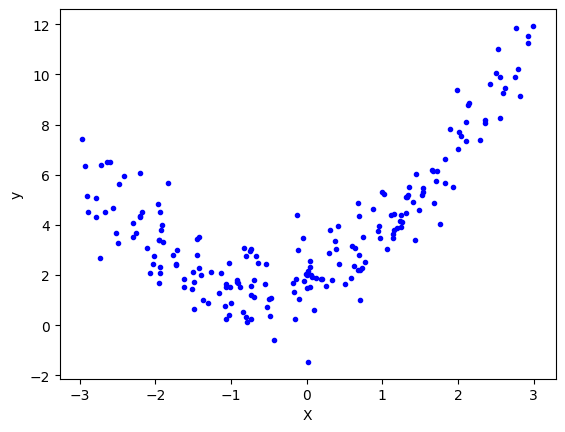

In [3]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [4]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [5]:
# Applying linear regression
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.13071339248754732

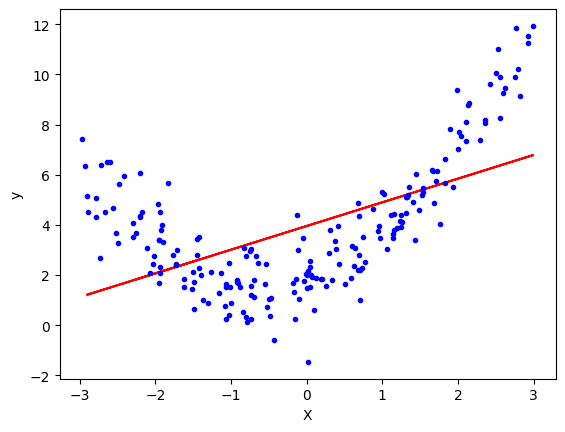

In [8]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [9]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [10]:
print(X_train[0])
print(X_train_trans[0])

[-2.25964083]
[ 1.         -2.25964083  5.10597667]


In [11]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8803272648672954

In [13]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.97428165 0.78602508]]
[1.91630928]


In [14]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

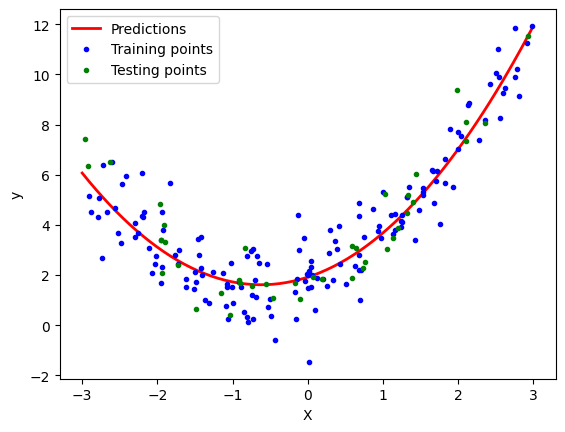

In [15]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [20]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

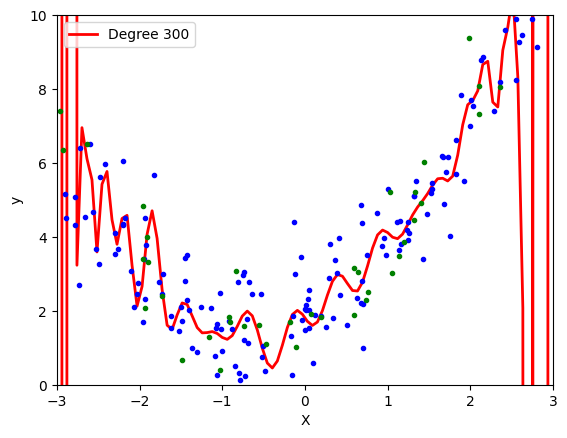

In [21]:
polynomial_regression(300)

In [22]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


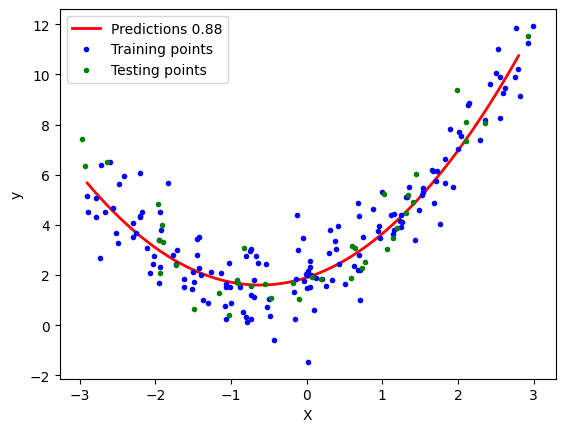

In [23]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [24]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [25]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [26]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)



In [27]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [28]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [29]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [31]:
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [11  3]
 

In [32]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [33]:
X_test_multi = poly.transform(final)

In [34]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [35]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()